### Project Euler

### Test Function

In [87]:
def max_product(number_string,adjacent_digits):
    list_prod=[]
    for i in range(0,988):
        number_str=list(number_string)
        prod = int(number_str[i]) * int(number_str[i+1]) * int(number_str[i+2]) * int(number_str[i+3]) \
        * int(number_str[i+4]) * int(number_str[i+5]) * int(number_str[i+6]) * int(number_str[i+7]) \
        * int(number_str[i+8]) \
        * int(number_str[i+9]) * int(number_str[i+10]) * int(number_str[i+11]) * int(number_str[i+12]) 
        list_prod.append(prod)

    return max(list_prod)

In [88]:
max_product(number, 13) #23514624000

23514624000

### Refined Version

In [19]:
number="7316717653133062491922511967442657474235534919493496983520312774506326239578318016984801869478851843858615607891129494954595017379583319528532088055111254069874715852386305071569329096329522744304355766896648950445244523161731856403098711121722383113622298934233803081353362766142828064444866452387493035890729629049156044077239071381051585930796086670172427121883998797908792274921901699720888093776657273330010533678812202354218097512545405947522435258490771167055601360483958644670632441572215539753697817977846174064955149290862569321978468622482839722413756570560574902614079729686524145351004748216637048440319989000889524345065854122758866688116427171479924442928230863465674813919123162824586178664583591245665294765456828489128831426076900422421902267105562632111110937054421750694165896040807198403850962455444362981230987879927244284909188845801561660979191338754992005240636899125607176060588611646710940507754100225698315520005593572972571636269561882670428252483600823257530420752963450"

In [97]:
def max_product(number_string, adjacent_digits):
    list_prod=[]
    for i in range(0, len(number_string)-adjacent_digits):
        number_str=list(number_string)
        prod=1
        for j in range(i, i+adjacent_digits):
            prod*=int(number_str[j])
            list_prod.append(prod)

    return max(list_prod)

In [98]:
max_product(number, 13) #23514624000

23514624000

### Linear Algebra

In [37]:
import numpy as np
def solve_for_w1(X, y):
    w = np.linalg.lstsq(X, y)
    return w

X = np.asmatrix([[5,3,7], [2,4,1]])
y = np.array([537, 241])
w = np.asmatrix(solve_for_w1(X, y)[0])
print(w)
np.dot(X, np.transpose(w))

In [38]:
def solve_for_w2(X, y):
    pinvx = np.linalg.pinv(X)
    w = np.dot(pinvx, y)
    return w

v = solve_for_w2(X, y)
print(w)
np.dot(X, np.transpose(w))

[[ 33.59201774  33.90687361  38.18847007]]
[[ 33.59201774  33.90687361  38.18847007]]


matrix([[ 537.],
        [ 241.]])

#### Finding Minimum

In [40]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
plt.style.use('ggplot')

In [94]:
# Vectorize Solution from Damien
# This will be faster because it's in C not in Python
candidate=np.arange(0, 10.1, 0.1).reshape(-1,1)
numbers=np.array([2,7,1,5,10]).reshape(1,-1)

SE = (numbers - candidate)**2
SSE = SE.sum(axis=1) #sum along the rows
print("Minimum:",min(SSE))
print("At Candidate:", candidate[np.argmin(SSE)])

Minimum: 54.0
At Candidate: [ 5.]


In [49]:
# My Solution
def sum_of_squares(df, candidate):
    sums=[]
    for c in candidate:
        one_sum=sum(df.map(lambda x: (x-c)**2))
        sums.append(one_sum)
    return list(zip(candidate, sums))

results = sum_of_squares(df, candidate)
min(results, key=lambda pairs: pairs[1])

In [99]:
# Practicing Pandas
resultdf=pd.DataFrame(results, columns=('candidate', 'sum'))
resultdf.sort_values(by="sum", inplace=True)
resultdf[:1]

,candidate,sum
50,5.0,54.0


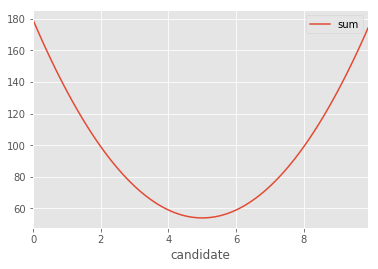

In [104]:
resultdf.sort_values(by="candidate", inplace=True)
resultdf.plot(x="candidate", y="sum")

In [107]:
plt.plot(x=results["candidate"], y=results["sum"], color = 'green')

AttributeError: module 'matplotlib' has no attribute 'plot'

__Linear Regression__  
First make a response y of 200 random numbers. Then generate 20 random features in an X to predict with. Fit a linear model using both the 'Famous Equation' and the python built-ins. Check the summary() output of the results from the python built-ins. Do you have any features with P>|t| less than 0.05? (Repeat the process until you have at least one.)

Check out the model's R-squared and Adj. R-squared. Repeat the feature generation and model fitting process with 40, 60, 80, and 100 features. What happens with R-squared and Adj. R-squared?

If you have time, automate this experimental procedure and make a plot of R-squared and Adj. R-squared against number of features for one to one hundred features.

In [35]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [60]:
Y = pd.DataFrame(np.random.randint(0, 1000, 200), columns=["Y"])

In [61]:
Xs=['X'+str(num) for num in range(1,21)]
X = pd.DataFrame(np.random.randint(low=0, high=1000, size=(200, 20)),
                   columns=list(Xs))

In [64]:
df=pd.concat([X,Y], axis=1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,336,527,426,858,770,744,374,300,530,647,...,855,880,555,294,672,184,515,385,468,923
1,85,897,978,156,821,230,60,603,909,744,...,290,760,436,682,814,948,984,67,945,835
2,594,951,140,668,896,585,225,743,600,516,...,398,383,226,734,954,213,469,988,374,706
3,937,153,223,703,133,480,991,620,428,95,...,203,353,946,95,712,238,399,245,199,195
4,232,369,480,299,646,856,867,432,457,494,...,727,242,943,414,395,952,355,292,627,921


In [71]:
predictors=' + '.join(['X'+str(num) for num in range(1,21)])
predictors

'X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18 + X19 + X20'

In [73]:
model = smf.ols("Y ~ "+ predictors, data=df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.7661
Date:                Thu, 12 Jul 2018   Prob (F-statistic):              0.751
Time:                        09:32:24   Log-Likelihood:                -1406.8
No. Observations:                 200   AIC:                             2856.
Df Residuals:                     179   BIC:                             2925.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    288.4241    166.378      1.734      0.085     -39.890     616.738
X1            -0.0489      0.074     -0.658      0.511      -0.196       0.098
X2             0.0992      0.080      1.235      0.218      -0.059       0.258
X3             0.0197      0.073      0.271      0.787      -0.124       0.163
X4             0.1110      0.070      1.594      0.113      -0.026       0.249
X5            -0.0365      0.071     -0.511      0.610      -0.177       0.104
X6            -0.0206      0.074     -0.278      0.781      -0.167       0.125
X7             0.1274      0.079      1.614      0.108      -0.028       0.283
X8            -0.0703      0.070     -1.002      0.318      -0.209       0.068
X9            -0.0462      0.077     -0.599      0.550      -0.198       0.106
X10            0.0312      0.076      0.408      0.683      -0.120       0.182
X11            0.0509      0.073      0.693      0.489      -0.094       0.196
X12            0.0792      0.076      1.042      0.299      -0.071       0.229
X13            0.0393      0.077      0.511      0.610      -0.112       0.191
X14           -0.0873      0.076     -1.143      0.255      -0.238       0.063
X15            0.0565      0.073      0.774      0.440      -0.088       0.201
X16            0.0117      0.074      0.158      0.875      -0.135       0.158
X17            0.0429      0.075      0.571      0.569      -0.105       0.191
X18           -0.0408      0.076     -0.540      0.590      -0.190       0.108
X19            0.0900      0.075      1.206      0.229      -0.057       0.237
X20            0.0355      0.076      0.466      0.642      -0.115       0.186
==============================================================================
Omnibus:                       35.212   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.471
Skew:                          -0.019   Prob(JB):                       0.0145
Kurtosis:                       1.993   Cond. No.                     1.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
fit.rsquared

0.078849963926056588

In [82]:
fit.params[:5]

Intercept    288.424115
X1            -0.048942
X2             0.099240
X3             0.019716
X4             0.111036
dtype: float64

In [62]:
B=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
B

array([ 0.02863588,  0.04461814,  0.03276132,  0.03408156,  0.04058655,
        0.07230669,  0.09982962,  0.0888263 ,  0.04861035, -0.01080773,
        0.00126414,  0.11886991,  0.08750265, -0.01292715, -0.09095459,
        0.04355101,  0.07707625,  0.15567104, -0.00061114,  0.06349928])

In [93]:
def test_ols(features):
    Y = pd.DataFrame(np.random.randint(0, 1000, 200), columns=["Y"])
    Xs=['X'+str(num) for num in range(1,features+1)]
    X = pd.DataFrame(np.random.randint(low=0, high=1000, size=(200, features)),
                       columns=list(Xs))
    
    df=pd.concat([X,Y], axis=1)
    predictors=' + '.join(['X'+str(num) for num in range(1,features+1)])
    
    model = smf.ols("Y ~ "+ predictors, data=df)
    fit = model.fit()
    fit.summary()
    return [fit.rsquared, fit.rsquared_adj]

In [94]:
test_ols(20)

[0.032425177124024041, -0.075683741633068236]

In [95]:
rsquares = []
adjusted = []
for j in range(20, 81):
    rsquares.append(test_ols(j)[0])
    adjusted.append(test_ols(j)[1])

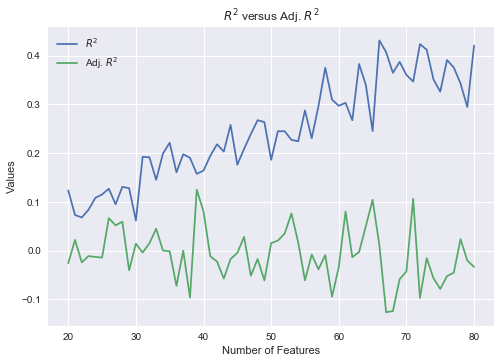

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
x=range(20, 81)
plt.plot(x, rsquares)
plt.plot(x, adjusted)
plt.title('$R^2$ versus Adj. $R^2$')
plt.xlabel('Number of Features')
plt.ylabel('Values')
plt.legend([r"$R^2$", r"Adj. $R^2$"])
plt.show()